In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv(r'..\data\dataset_wTotal.csv')
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_total
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


In [5]:
print(f"Taille du dataset avant suppression des outliers: {df.shape}")
cols_to_check = ['income', 'mnt_total']

Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)]
print(f"Taille du dataset après suppression des outliers: {df.shape}")



Taille du dataset avant suppression des outliers: (2240, 30)
Taille du dataset après suppression des outliers: (2229, 30)


In [6]:
bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['[0:20000]', '[20001:40000]', '[40001:60000]', '[60001:80000]', '[80001:100000]', '[100001: + ]']

df['income_class'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)
print(df[['income', 'income_class']].head())


    income   income_class
0  58138.0  [40001:60000]
1  46344.0  [40001:60000]
2  71613.0  [60001:80000]
3  26646.0  [20001:40000]
4  58293.0  [40001:60000]


**EJE2**
# ¿Cómo varía el tipo de gasto en comida según los ingresos de los clientes? Muestra visualmente que tipo de productos son los más consumidos por los clientes según su nivel de ingresos.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_by_class = df.groupby('income_class')[mnt_columns].sum()
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')


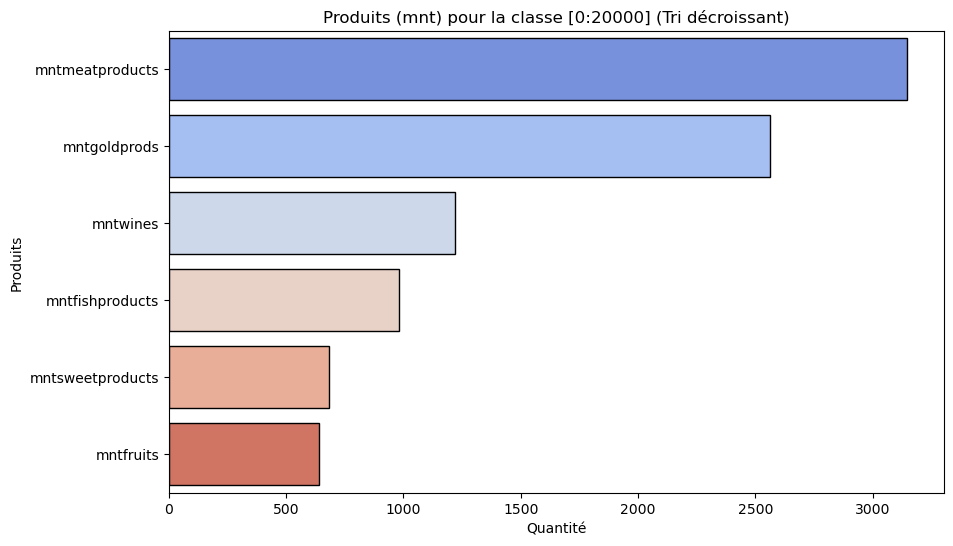

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')


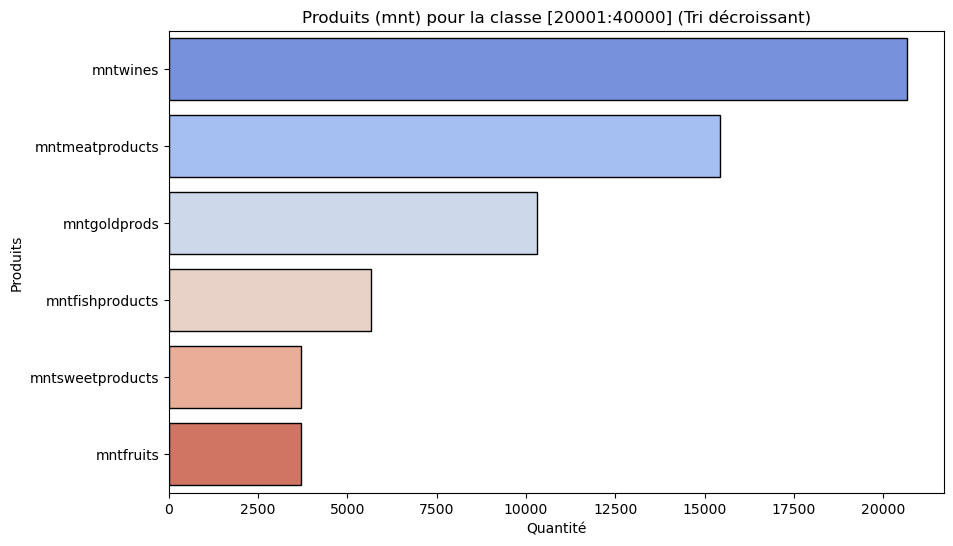

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')


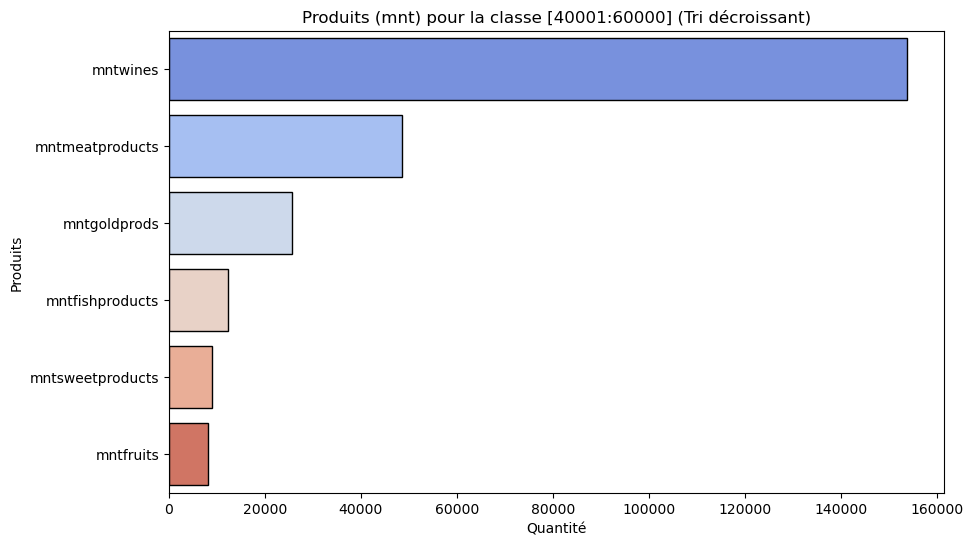

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')


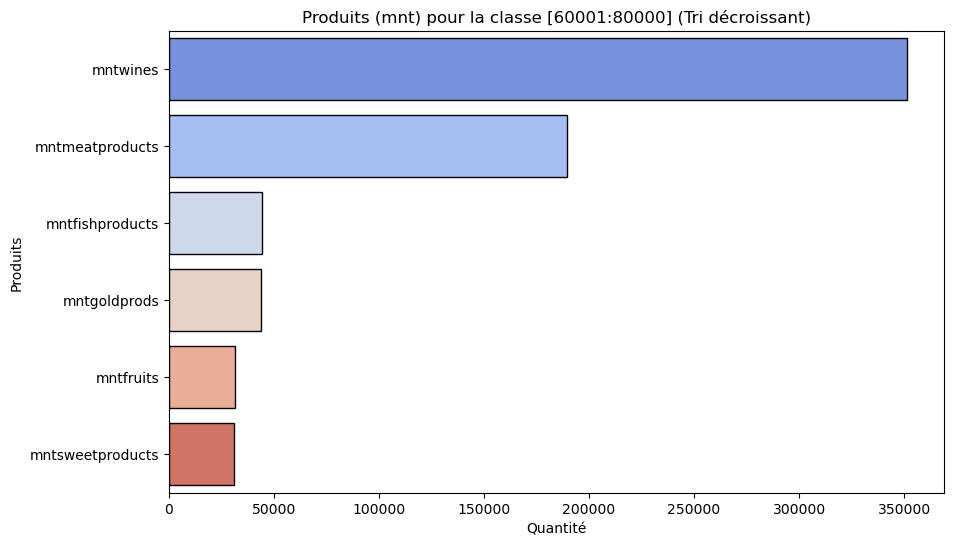

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')


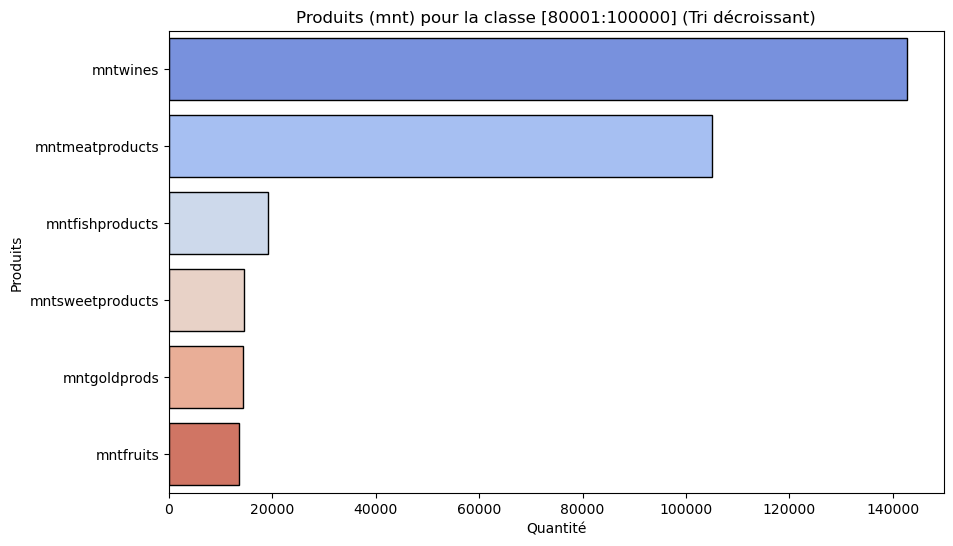

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12484\1147530166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')


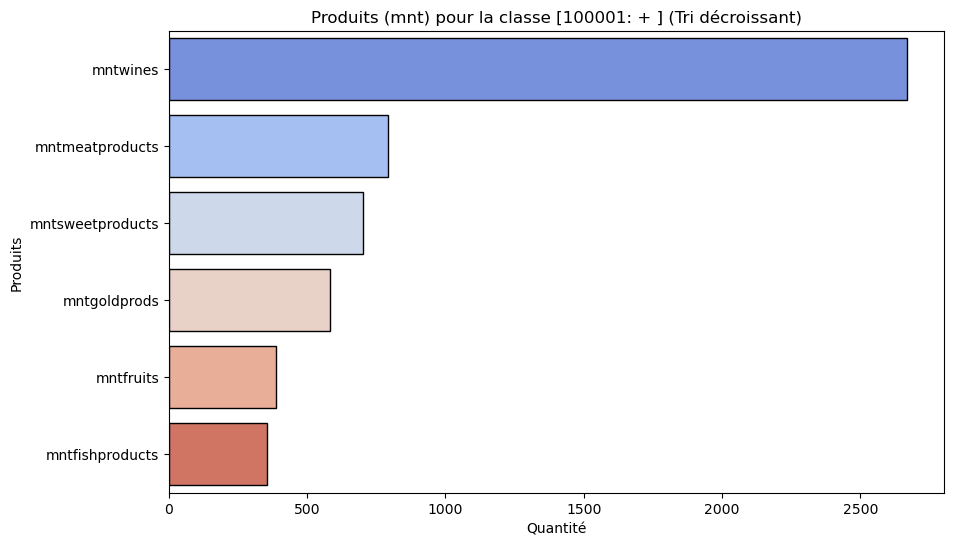

In [7]:
mnt_columns = [col for col in df.columns if col.startswith('mnt') and col != 'mnt_total']
df_grouped_by_class = df.groupby('income_class')[mnt_columns].sum()

for income_class in df_grouped_by_class.index:
  
    sorted_data = df_grouped_by_class.loc[income_class].sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_data.values, y=sorted_data.index, palette='coolwarm', orient='h', edgecolor='black')
    plt.title(f"Produits (mnt) pour la classe {income_class} (Tri décroissant)")
    plt.xlabel("Quantité")
    plt.ylabel("Produits")
    plt.show()

**Al observar la distribución de los gastos:

La clase de ingresos entre 0 y 20,000 gasta mayoritariamente en carne y productos de lujo.\
La clase de ingresos entre 20,001 y 40,000 gasta mayoritariamente en vino y carne.\
La clase de ingresos entre 40,001 y 60,000 gasta mayoritariamente en vino.\
La clase de ingresos entre 60,001 y 80,000 gasta mayoritariamente en vino y carne.\
La clase de ingresos entre 80,001 y 100,000 gasta mayoritariamente en vino y carne.\
La clase de ingresos entre 60,001 y 80,000 gasta mayoritariamente en vino y carne.**